# Iris Project

## Data Exploration and Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes =True)
%matplotlib inline
sns.set_style('whitegrid')

# Iris Data from Seaborn

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


In [5]:
print(iris.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


# Visualisation

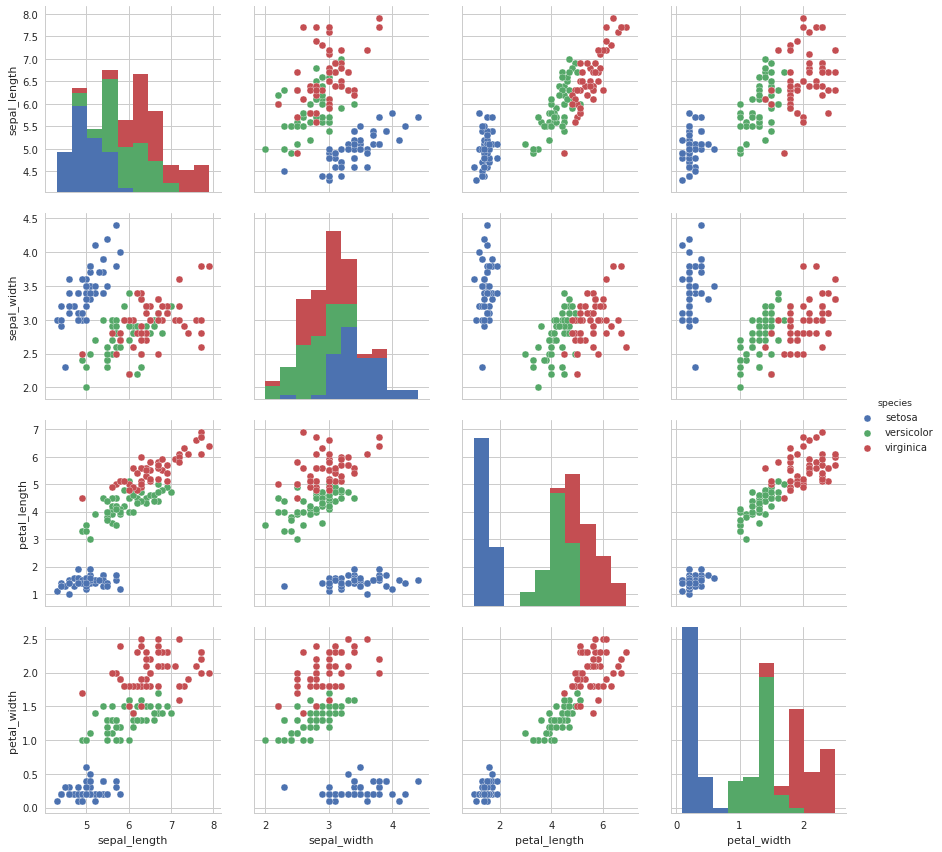

In [6]:
sns.pairplot(iris,hue='species',size=3,aspect=1)

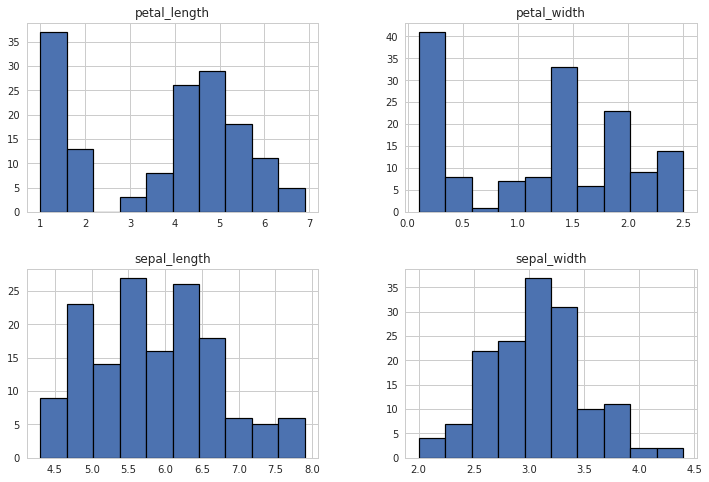

In [7]:
iris.hist(edgecolor='black',linewidth=1.2,figsize=(12,8))
plt.show()

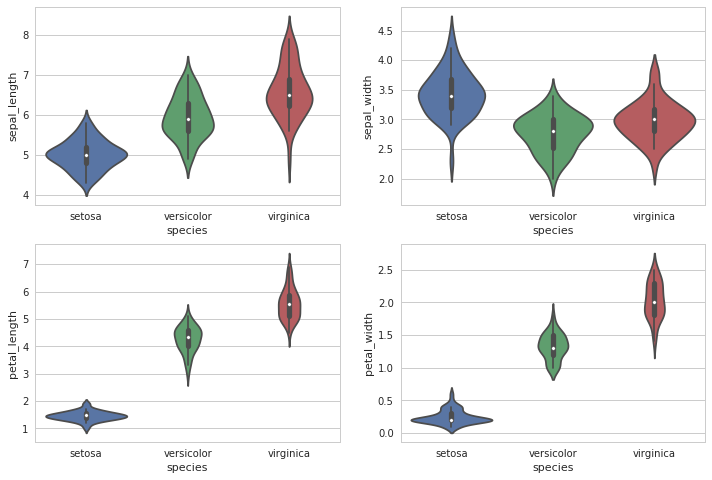

In [8]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data = iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data = iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data = iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width',data = iris)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6844f74748>,
      dtype=object)

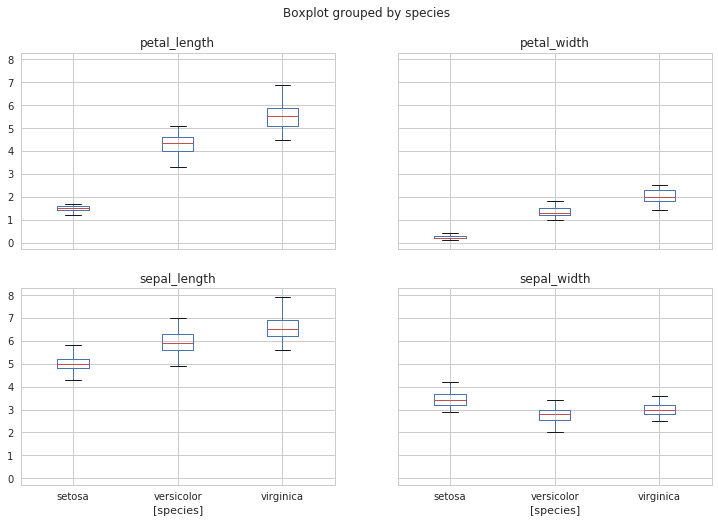

In [9]:
iris.boxplot(by='species',figsize=(12,8))

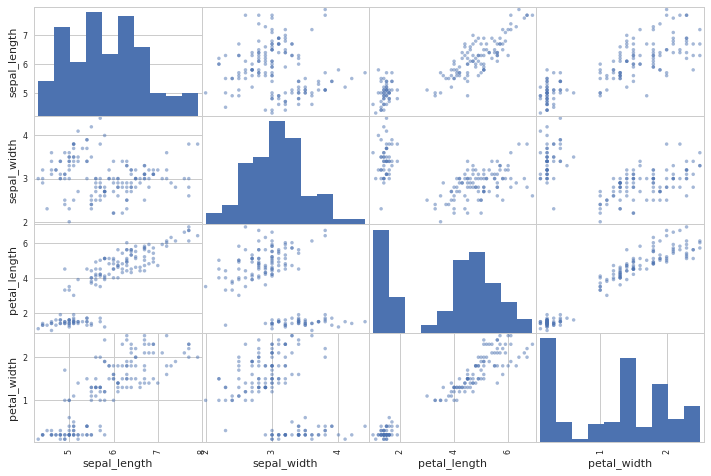

In [10]:
pd.plotting.scatter_matrix(iris,figsize=(12,8))
plt.show()

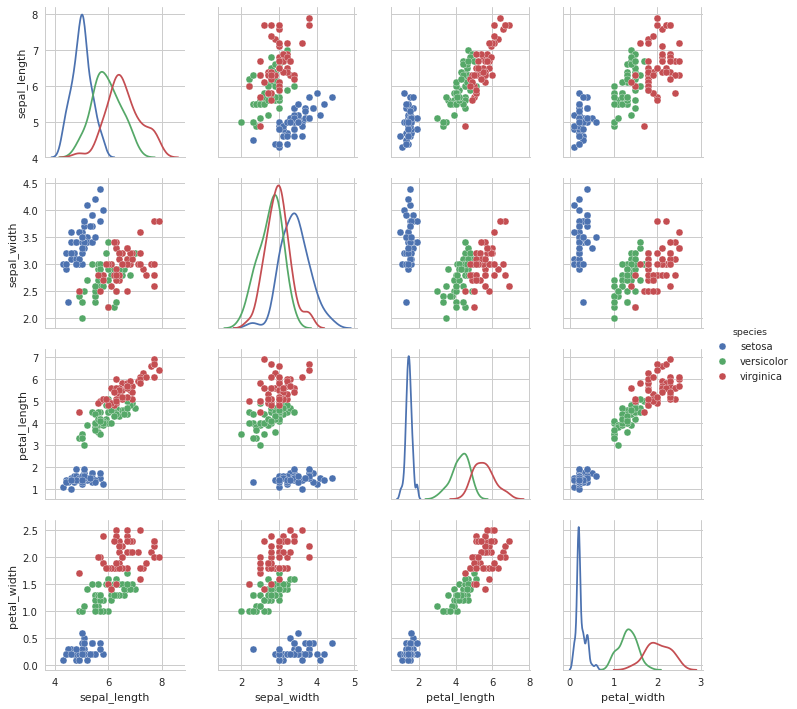

In [11]:
sns.pairplot(iris,hue='species',diag_kind="kde")

***

# Function to return test and train results

In [12]:
def print_result(clf,X_train,X_test,y_train,y_test,train):
    if train==True:
        print("Training Results\n")
        print("Accuracy = {}".format(accuracy_score(y_train,clf.predict(X_train))))
        print("\nClassification Report\n {}".format(classification_report(y_train,clf.predict(X_train))))
        print("Confusion Matrix \n {}".format(confusion_matrix(y_train,clf.predict(X_train))))
    else:    
        print("Testing results\n")
        print("Accuracy = {}".format(accuracy_score(y_test,clf.predict(X_test))))
        print("\nClassification Report\n {}".format(classification_report(y_test,clf.predict(X_test))))
        print("Confusion Matrix \n {}".format(confusion_matrix(y_test,clf.predict(X_test))))

# Dataset splitting

In [13]:
col = ['petal_length','petal_width']
X = iris.loc[:,col]


In [15]:
species_to_num = {'setosa':0,'versicolor':1,'virginica':2}
iris['tmp'] = iris['species'].map(species_to_num)
y = iris['tmp']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

***

# Naive Bayes Classifier

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [21]:
clf = GaussianNB()

In [22]:
clf.fit(X,y)

GaussianNB(priors=None)

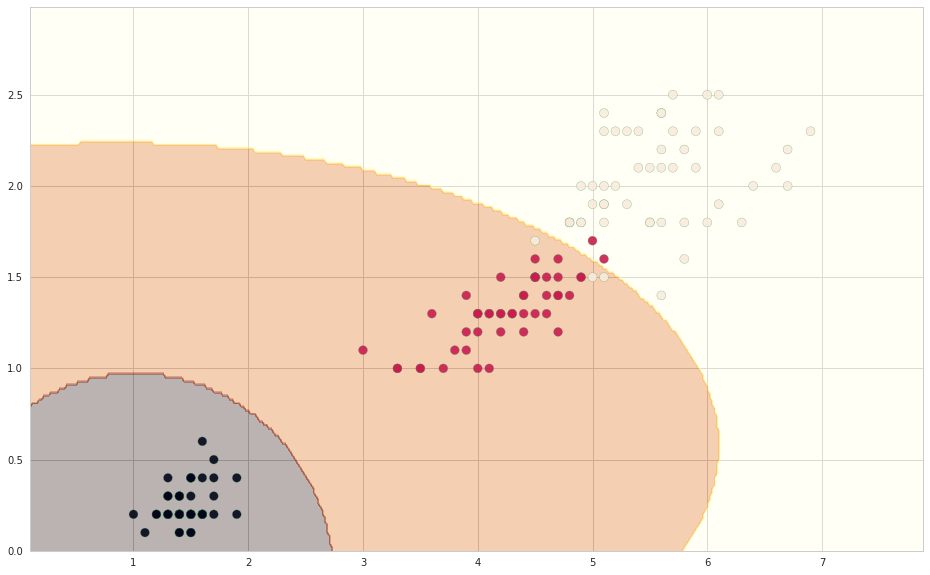

In [23]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min,x_max = Xv.min(),Xv.max()+1
y_min,y_max = y.min(),y.max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3)
plt.scatter(X.values[:,0],X.values[:,1],c=y,s=80,alpha=0.9,edgecolors='g')

## Train Results

In [34]:
print_result(clf,X_train,X_test,y_train,y_test,True)

Training Results

Accuracy = 0.95

Classification Report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        40
          1       0.93      0.93      0.93        41
          2       0.92      0.92      0.92        39

avg / total       0.95      0.95      0.95       120

Confusion Matrix 
 [[40  0  0]
 [ 0 38  3]
 [ 0  3 36]]


## Test Results

In [35]:
print_result(clf,X_train,X_test,y_train,y_test,False)

Testing results

Accuracy = 1.0

Classification Report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        30

Confusion Matrix 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


***

# Support Vector Machine

In [16]:
from sklearn import svm

In [17]:
clf = svm.SVC(kernel='linear',C=1)

In [18]:
clf.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

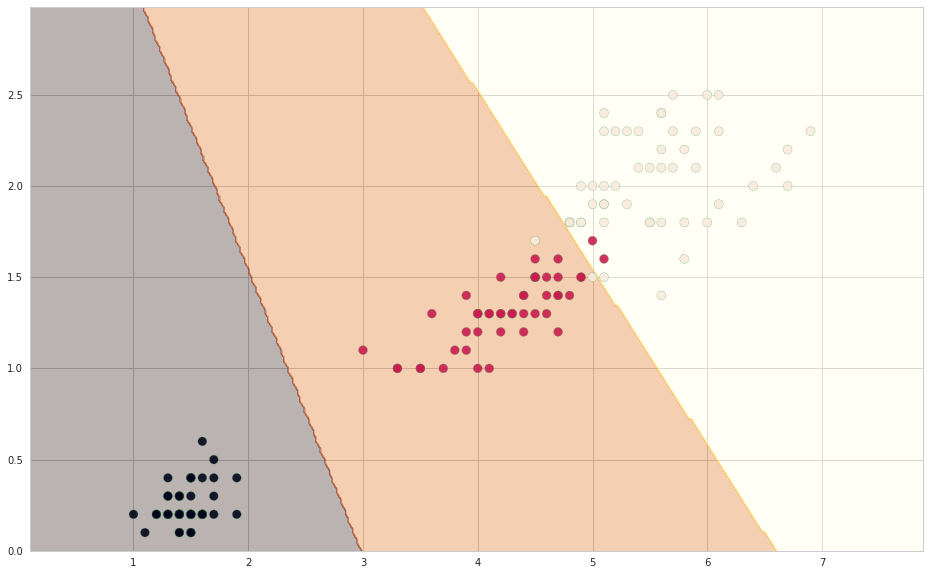

In [19]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min,x_max = Xv.min(),Xv.max()+1
y_min,y_max = y.min(),y.max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3)
plt.scatter(X.values[:,0],X.values[:,1],c=y,s=80,alpha=0.9,edgecolors='g')

## Train Results

In [36]:
print_result(clf,X_train,X_test,y_train,y_test,True)

Training Results

Accuracy = 0.95

Classification Report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        40
          1       0.93      0.93      0.93        41
          2       0.92      0.92      0.92        39

avg / total       0.95      0.95      0.95       120

Confusion Matrix 
 [[40  0  0]
 [ 0 38  3]
 [ 0  3 36]]


## Test Results

In [37]:
print_result(clf,X_train,X_test,y_train,y_test,False)

Testing results

Accuracy = 1.0

Classification Report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        30

Confusion Matrix 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


***

# KNN(k-nearest Neighbors) Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=10 )

In [30]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

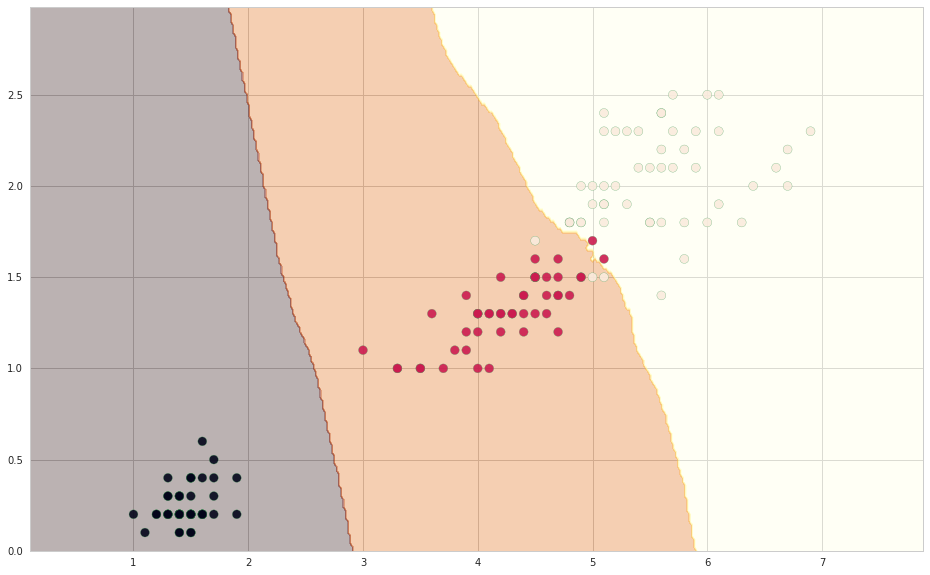

In [31]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min,x_max = Xv.min(),Xv.max()+1
y_min,y_max = y.min(),y.max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3)
plt.scatter(X.values[:,0],X.values[:,1],c=y,s=80,alpha=0.9,edgecolors='g')

## Train Results

In [38]:
print_result(knn,X_train,X_test,y_train,y_test,True)

Training Results

Accuracy = 0.95

Classification Report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        40
          1       0.93      0.93      0.93        41
          2       0.92      0.92      0.92        39

avg / total       0.95      0.95      0.95       120

Confusion Matrix 
 [[40  0  0]
 [ 0 38  3]
 [ 0  3 36]]


## Test Results

In [39]:
print_result(knn,X_train,X_test,y_train,y_test,False)

Testing results

Accuracy = 1.0

Classification Report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        30

Confusion Matrix 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
